0.0
()


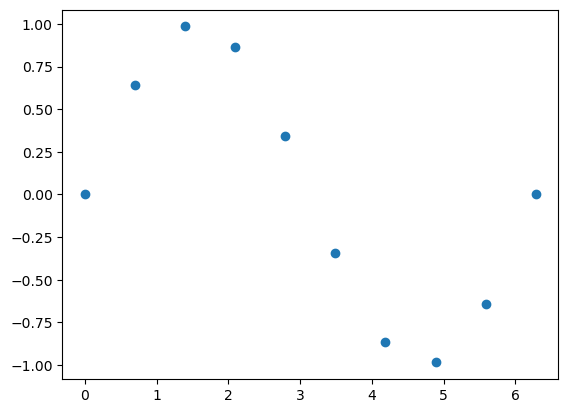

In [1]:
#scipy.interpolate是SciPy中负责插值操作的子模块。
from scipy import interpolate
import numpy as np
#插值(Interpolation)是通过已知的离散数据点求未知数据的过程或方法。
#对于若干离散的数据点(x, y)，可以通过某种方法得到一个经过所有已知数据点的连续函数y=f(x)，然后通过该函数预测未知点x'的对应值f（x'）。
x=np.linspace(0,2*np.pi,10)
y=np.sin(x)
import matplotlib.pyplot as plt
plt.plot(x,y,'o')
#一维插值问题对应的函数为interpolate. interp1d()。该函数接受一组x值和对应的y值，返回拟合后得到的函数：
#返回值f可以像函数一样被调用。当输入值为数字时，f返回一个NumPy数组：
f=interpolate.interp1d(x,y)
print(f(0))
print(f(0).shape)

In [2]:
print(f([np.pi/6,np.pi/2]))#输入值为数组或列表时，f返回对应大小的数组
#默认情况下，插值函数允许的定义域范围由输入数据的范围决定。对于超出范围的数据，调用f会抛出异常。
#可以通过在调用插值函数时加入bounds_error参数来允许超出范围的输入：
f=interpolate.interp1d(x,y,bounds_error=False)

[0.48209071 0.95511217]


In [3]:
#若输入值超过插值范围，输出为np.nan：
f(-np.pi)

array(nan)

In [4]:
#还可以加入fill_value参数来指定超出范围的默认返回值：
f=interpolate.interp1d(x,y,bounds_error=False,fill_value=-100)
f(-np.pi)

array(-100.)

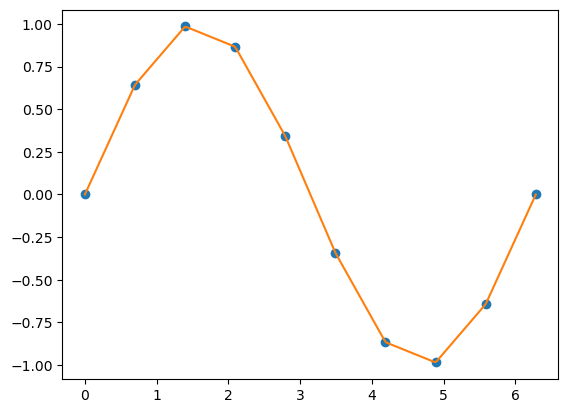

In [5]:
#线性插值(Linear Interpolation)是最常使用的插值方法，也是插值函数的默认方法。
t=np.linspace(0,2*np.pi,200)
plt.plot(x,y,'o',t,f(t))

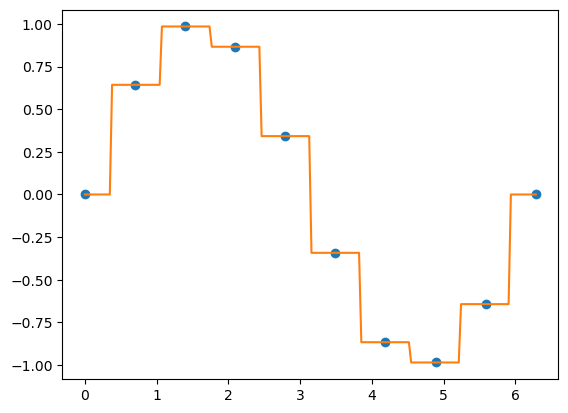

In [6]:
f=interpolate.interp1d(x,y,kind='nearest')
#'nearest'：最近邻插值，x对应的值为离x最近的点对应的值。
plt.plot(x,y,'o',t,f(t))

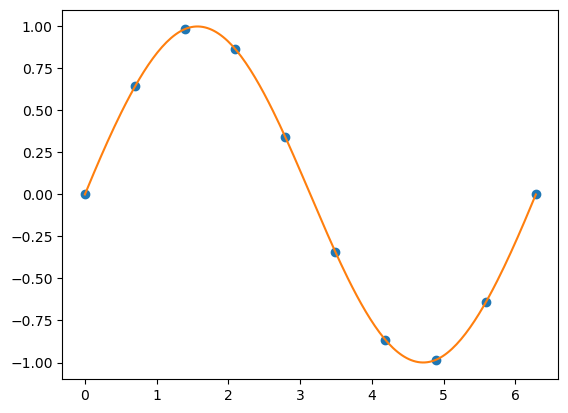

In [7]:
f=interpolate.interp1d(x,y,kind='cubic')
#'cubic'：三次函数插值。
plt.plot(x,y,'o',t,f(t))

In [8]:
#scipy.stats是Scipy中负责概率统计相关的子模块。
from scipy import stats
h=np.array([1.46,1.79,2.01,1.75,1.56,1.69,1.88,1.76,1.88,1.78])
print(h.std(),h.var(),np.median(h))

0.15081114017207078 0.022743999999999986 1.77


In [9]:
#众数及其出现次数：
print(stats.mode(h))
#偏度和峰度：
print(stats.skew(h),stats.kurtosis(h))

ModeResult(mode=array([1.88]), count=array([2]))
-0.3935244564726347 -0.33067209772439865


C:\Users\lenovo\AppData\Local\Temp\ipykernel_32024\2865470083.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(stats.mode(h))


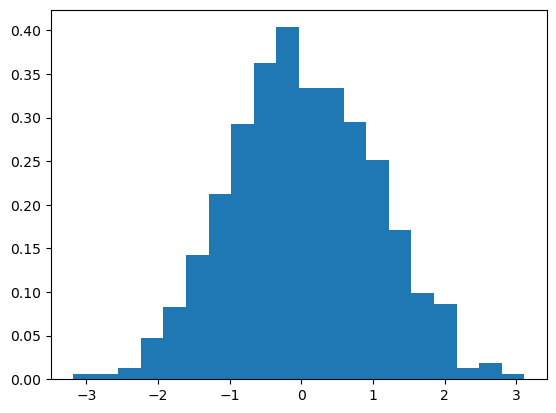

In [10]:
from scipy.stats import norm#正态分布
#可以用方法.rvs()来产生一个服从标准正态分布的数组：
x_norm=norm.rvs(size=1000)
#标准正态分布数据的直方图
h=plt.hist(x_norm,bins=20,density=True)

In [11]:
x_mean,x_std=norm.fit(x_norm)
print(x_mean,x_std)

0.03178213081965814 1.0117391386054944


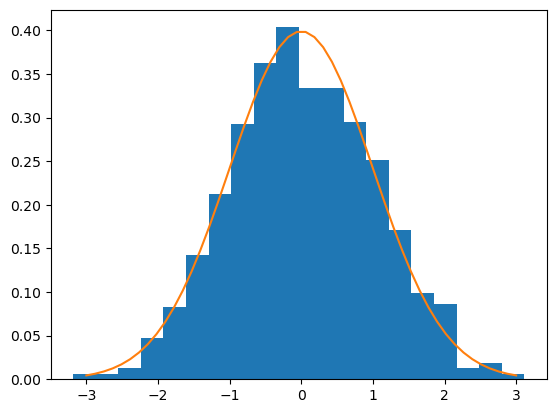

In [12]:
#可以用.pdf(x)方法来计算正态分布在x处对应的概率密度函数值，其中x可以是一个数组：
x=np.linspace(-3,3)
p=norm.pdf(x)
h=plt.hist(x_norm,bins=20,density=True)
plt.plot(x,p)

In [13]:
#累积分布
print(norm.cdf(1)-norm.cdf(-1))
print(norm.cdf(2)-norm.cdf(-2))
print(norm.cdf(3)-norm.cdf(-3))

0.6826894921370859
0.9544997361036416
0.9973002039367398


In [14]:
#累积分布的反函数
norm.ppf(0.5)

0.0

scipy.stats模块可以使用位置和尺度参数来改变概率分布的参数。设位置参数为loc，尺度参数为scale，对概率密度函数为p(x)的概率分布，进行尺度与平移变换后，新的概率密度函数为p（（x-loc）/scale）。在正态分布的例子中，.fit()方法返回的其实是对这两个参数的估计。在正态分布中，这两个参数恰好对应分布的均值和标准差。可以通过这两个参数得到不同参数的概率分布。

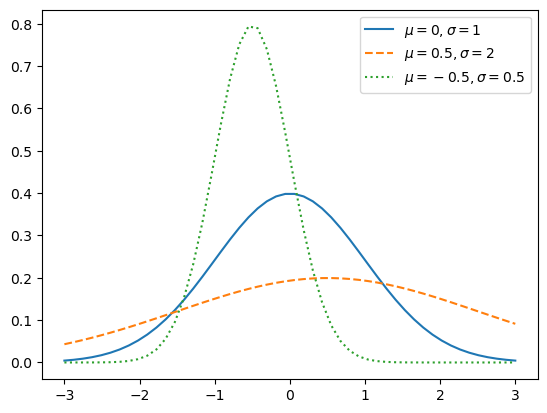

In [15]:
x=np.linspace(-3,3)
plt.plot(x,norm.pdf(x),
         x,norm.pdf(x,loc=0.5,scale=2),'--',
        x,norm.pdf(x,loc=-0.5,scale=0.5),':')
plt.legend([r'$\mu=0,\sigma=1$',
           r'$\mu=0.5,\sigma=2$',
           r'$\mu=-0.5,\sigma=0.5$'])

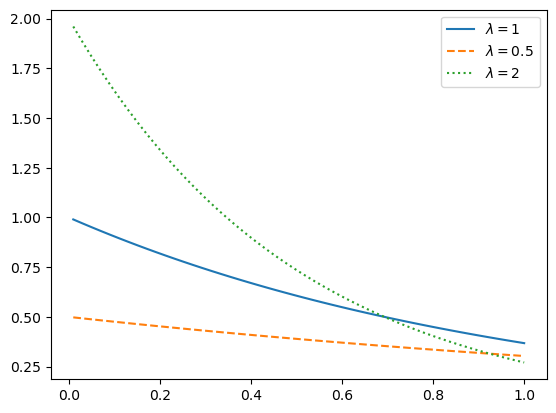

In [16]:
#scipy.stats中还包括一些其他的连续分布，如指数分布expon和学生t分布t等：
from scipy.stats import expon,t
#指数分布的参数λ是尺度参数scale的倒数
x=np.linspace(0.01,1)
plt.plot(x,expon.pdf(x),
        x,expon.pdf(x,scale=2),'--',
        x,expon.pdf(x,scale=0.5),':')
plt.legend([r'$\lambda=1$',r'$\lambda=0.5$',r'$\lambda=2$'])

In [17]:
#某些概率分布需要使用额外参数来定义，额外参数的个数可以通过分布对象的.numargs属性查看。
print(expon.numargs)
print(norm.numargs)
print(t.numargs)
#额外参数的名称可以用.shapes属性查看：
print(t.shapes)

0
0
1
df


<StemContainer object of 3 artists>

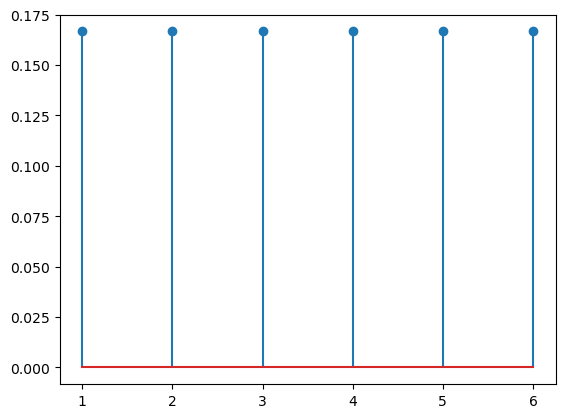

In [18]:
 #离散分布没有概率密度函数，但是有概率质量函数(Probability Mass Function, PMF)，用来表示每个离散点上的概率。
#离散均匀分布可以用randint来构造：
from scipy.stats import randint
#概率质量函数可以使用.pmf()方法计算
x=np.arange(1,7)
plt.stem(x,randint(1,7).pmf(x))
#plt.stem()函数是用来绘制杆状图的函数。

In [19]:
#离散均匀分布有两个额外参数：
randint.shapes

'low, high'

In [20]:
#二项分布
from scipy.stats import binom
binom.shapes

'n, p'

<StemContainer object of 3 artists>

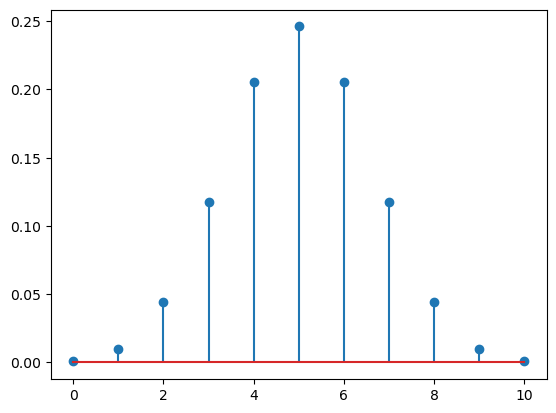

In [21]:
#n是二项分布的试验次数，p是每次试验得到1的概率。
x=np.arange(0,11)
plt.stem(x,binom(n=10,p=0.5).pmf(x))

In [22]:
#泊松分布
from scipy.stats import poisson
poisson.shapes

'mu'

([<matplotlib.axis.XTick at 0x1dd1b40e590>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

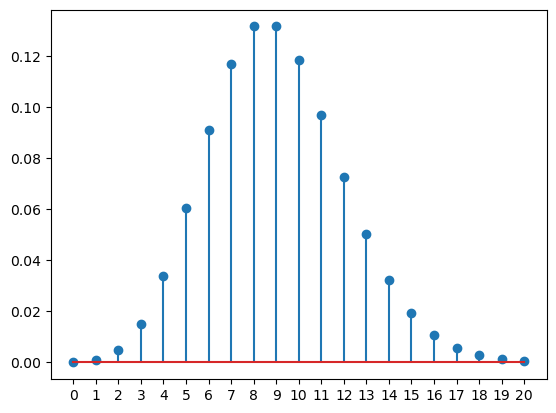

In [23]:
x=np.arange(21)
plt.stem(x,poisson(9).pmf(x))
plt.xticks(x)

In [24]:
#自定义rv_continuous（连续分布）和rv_discrete（离散分布）
from scipy.stats import rv_continuous,rv_discrete
#正态分布可以自定义如下：
class GaussianGen(rv_continuous):
    def _pdf(self,x):
        return np.exp(-x**2/2.)/np.sqrt(2.0*np.pi)

In [25]:
gaussian=GaussianGen()
gaussian.cdf(3)-gaussian.cdf(-3)

0.9973002039367398

In [26]:
gaussian(loc=1,scale=3).mean()

0.9999999999999982

In [27]:
gaussian(loc=1,scale=3).std()

2.999999998960331

In [30]:
xk=[1,2,3,4,5,6]
pk=[.3,.35,.25,.05,.025,.025]
#利用它们构建一个自定义离散分布对象：
loaded=rv_discrete(values=(xk,pk))

In [31]:
#产生服从该分布的随机数：
loaded.rvs(size=(6,))

array([3, 3, 6, 2, 2, 5])

In [ ]:
#scipy.optimize是SciPy中负责优化的子模块

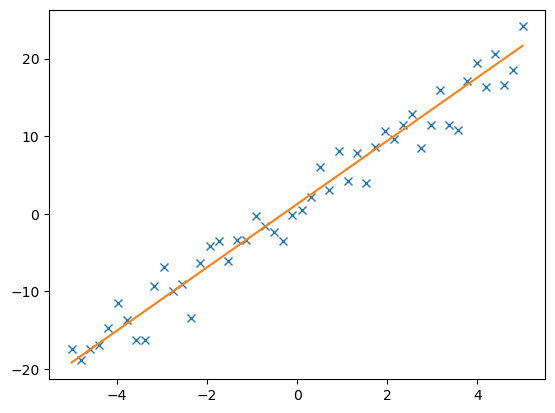

In [34]:
x=np.linspace(-5,5,50)
y=4*x+1.5
y_noise=y+np.random.randn(50)*2
plt.plot(x,y_noise,'x',
        x,coeff[0]*x+coeff[1])

In [33]:
#拟合与插值不同，拟合不要求得到的曲线经过所有的数据点。
#多项式拟合的系数可以使用NumPy模块的np.polyfit()函数来得到：
coeff=np.polyfit(x,y_noise,1)
print(coeff)

[4.08217671 1.23318942]


In [35]:
f=np.poly1d(coeff)
print(f)
f

 
4.082 x + 1.233


poly1d([4.08217671, 1.23318942])

In [36]:
print(f**2+2*f+3)

       2
16.66 x + 18.23 x + 6.987


(-9.42477796076938, 9.42477796076938, -1.5, 1.5)

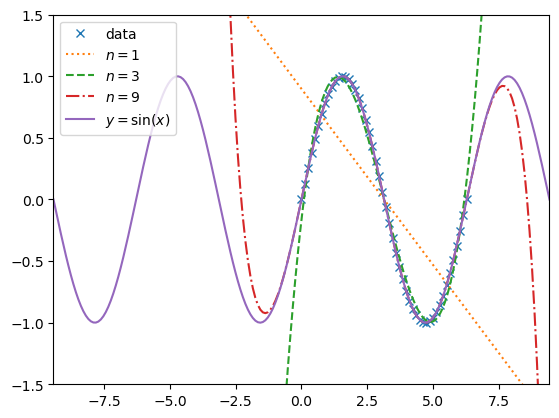

In [39]:
x=np.linspace(0,np.pi*2)
y=np.sin(x)
f1=np.poly1d(np.polyfit(x,y,1))
f2=np.poly1d(np.polyfit(x,y,3))
f3=np.poly1d(np.polyfit(x,y,9))
t=np.linspace(-3*np.pi,3*np.pi,200)
plt.plot(x,y,'x',t,f1(t),':',
         t,f2(t),'--',t,f3(t),'-.',t,np.sin(t))
plt.legend(['data',r'$n=1$',r'$n=3$',r'$n=9$',r'$y=\sin(x)$'])
plt.axis([-3*np.pi,3*np.pi,-1.5,1.5])

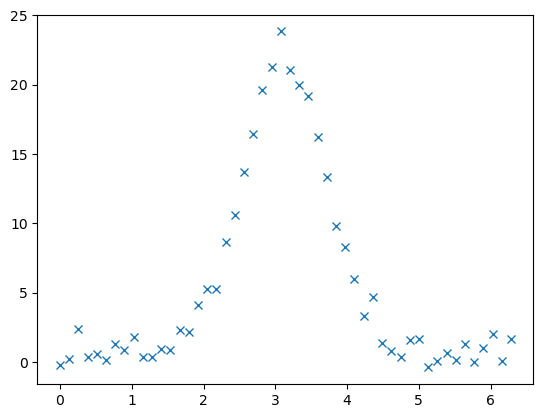

In [41]:
from scipy import optimize
def my_f(x,a,b,w,t):
    return a*np.exp(-b*np.sin(w*x+t))
x=np.linspace(0,2*np.pi)
actual_parameters=[3,2,1.25,np.pi/4]
y=my_f(x,*actual_parameters)
y_noise=y+0.8*np.random.randn(len(y))
plt.plot(x,y_noise,'x')

In [42]:
#最小二乘估计对应的函数为optimize.leastsq()
#其中，第一个参数为误差函数err_f，第二个参数为误差函数中p的初始估计
#第三个参数为误差函数err_f需要的两个额外参数。
def err_f(p,x,y):
    return y-my_f(x,*p)
c,rv=optimize.leastsq(err_f,[1,1,1,1],args=(x,y_noise))
print(c,rv)

[3.33150227 1.90678802 1.30316865 0.64065761] 1


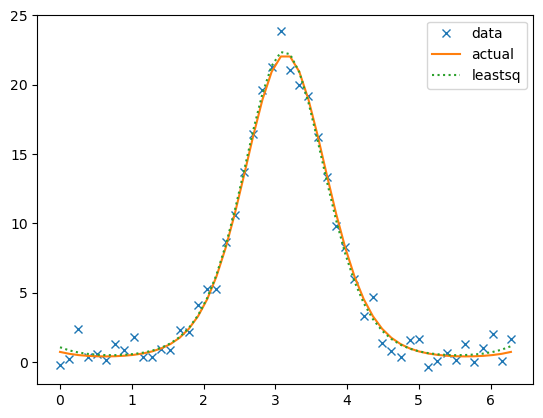

In [45]:
plt.plot(x,y_noise,'x',x,y,x,my_f(x,*c),":")
plt.legend(['data','actual','leastsq'])

In [46]:
#也可以不定义误差函数，用optimize.curve_fit()函数直接对my_f()的参数进行拟合：
p_est,err_est=optimize.curve_fit(my_f,x,y_noise)

In [47]:
p_est#p_est是对参数的估计值,err_est则是4个估计参数的协方差矩阵。

array([3.3315023 , 1.90678801, 1.30316865, 0.6406576 ])

Text(0, 0.5, '$d$')

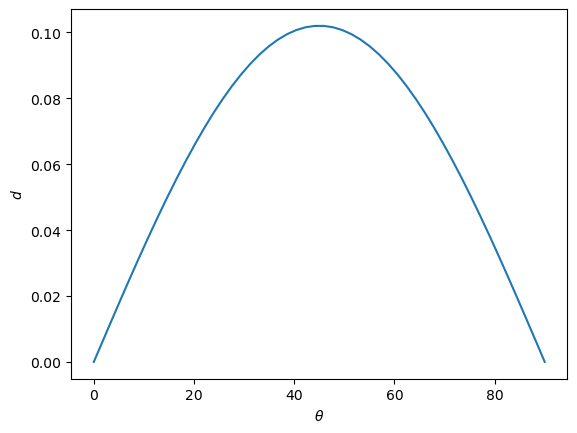

In [48]:
def fly_dist(theta,v0):
    g=9.8
    theta_rad=np.pi*theta/180.
    return v0**2/g*np.sin(2*theta_rad)
t=np.linspace(0,90)
plt.plot(t,fly_dist(t,1))
plt.xlabel(r'$\theta$')
plt.ylabel(r'$d$')

In [50]:
#定义函数求距离的相反数：
fly_dist_neg=lambda theta,v0:-fly_dist(theta,v0)
from scipy import optimize
#设定初始猜测为10°，并将初速度v0通过额外参数传入：
res=optimize.minimize(fly_dist_neg,10,args=(1,))
print(res)
#success为True，优化算法成功找到了一个解。而函数的最小值存储在.fun属性中，最小值对应的角度可以用.x属性查看：

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.10204081529676719
        x: [ 4.500e+01]
      nit: 4
      jac: [ 5.066e-07]
 hess_inv: [[ 8.179e+03]]
     nfev: 22
     njev: 11


In [51]:
optimize.rosen([2,3,4,5])
#Rosenbrock函数是一个用来测试优化算法效果的非凸函数

14714.0

In [53]:
res=optimize.minimize(optimize.rosen,[-1,0.3,2])
res.x

array([0.99999731, 0.99999462, 0.99998923])

In [56]:
res=optimize.minimize(optimize.rosen,[1.3,1.6,-0.5,-1.8,0.8])
print(res.x)
print(res.fun)

[-0.96205039  0.93573817  0.88071123  0.77787344  0.60508707]
3.9308394341547017


In [57]:
#默认情况下，optimize.minimize()函数使用BFGS算法：
x0=[1.3,1.6,-0.5,-1.8,0.8]
res=optimize.minimize(optimize.rosen,x0,method='CG')
res.x

array([0.99999902, 0.99999805, 0.9999961 , 0.99999223, 0.99998444])

In [58]:
res=optimize.minimize(optimize.rosen,x0,method='Nelder-Mead')
res.x

array([0.99999904, 1.00000295, 1.00000582, 1.00001145, 1.00002227])

In [60]:
#optimize.root()函数可以求解方程的根。
func=lambda x:x+np.cos(x)
optimize.root(func,0.3)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [-7.391e-01]
    nfev: 10
    fjac: [[-1.000e+00]]
       r: [-1.674e+00]
     qtf: [-1.388e-12]

In [61]:
#optimize.root()函数还可以求解方程组：
func2=lambda x:[x[0]*np.cos(x[1])-4,x[0]*x[1]-x[1]-5]
sol=optimize.root(func2,[1,1])
sol.x

array([6.50409711, 0.90841421])

In [64]:
import numpy.linalg
import scipy.linalg
print(len(dir(np.linalg)))
print(len(dir(scipy.linalg)))

35
159


In [65]:
from scipy import linalg
A=np.mat('[1,2;3,4]')
print(A)
print(A.T)
#果逆矩阵存在，对于矩阵类型，它的逆矩阵可以用.I属性查看：
print(A.I)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]


In [66]:
A=np.array([[1,2],[3,4]])
print(A)
print(A.T)
#数组没有.I属性，其逆矩阵可以用linalg.inv()函数计算：
print(linalg.inv(A))

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]


In [67]:
#数组的矩阵乘法需要使用.dot()方法或者运算符“@”进行计算：
print(A.dot(linalg.inv(A)))
print(A @ linalg.inv(A))

[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


In [68]:
A=np.matrix([[1,2],[3,4]])
print(A)

[[1 2]
 [3 4]]


In [70]:
#线性方程组的求解
A=np.array([[1,3,5],[2,5,-1],[2,3,8]])
b=np.array([10,8,3])
linalg.solve(A,b)

array([-8.83870968,  5.25806452,  0.61290323])

In [71]:
#linalg.det()函数可以计算矩阵的行列式：
linalg.det(A)

-31.000000000000007

In [72]:
#默认情况下，linalg.norm()函数计算的是矩阵的Frobenius范数，该范数计算的是矩阵所有元素平方和的平方根：
print(linalg.norm(A))
print(linalg.norm(A,'fro'))
#矩阵的1范数计算的是矩阵中每列元素的和的最大值：
print(linalg.norm(A,1))

11.916375287812984
11.916375287812984
14.0


In [73]:
#矩阵的-1范数计算的是矩阵中每列元素的和的最小值：
print(linalg.norm(A,-1))
#矩阵的2范数计算的是矩阵的最大奇异值：
print(linalg.norm(A,2))
#矩阵的-2范数计算的是矩阵的最小奇异值：
print(linalg.norm(A,-2))
#矩阵的正无穷范数计算的是矩阵中每行元素的和的最大值：
print(linalg.norm(A,np.inf))
#矩阵的负无穷范数计算的是矩阵中每行元素的和的最小值：
print(linalg.norm(A,-np.inf))
#linalg.norm()函数也可以用来计算向量的范数（也称模）：
print(linalg.norm(b))
#向量的1范数计算的是向量所有元素的和：
print(linalg.norm(b,1))
#向量的2范数计算的是向量所有元素平方和的平方根：
print(linalg.norm(b,2))
#向量的0范数计算的是向量所有元素中非零值个数：
print(linalg.norm(b,0))
#向量的无穷范数计算的是向量所有元素的最大值：
print(linalg.norm(b,np.inf))

5.0
10.683285386853822
0.5527161364952049
13.0
8.0
13.152946437965905
21.0
13.152946437965905
3.0
10.0


In [74]:
#对于形状为m×n的矩阵A，可以用linalg.pinv()求解其广义逆。
A=np.array([[1,2,3],[4,5,6]])
B=linalg.pinv(A)
#使用np.allclose()函数来验证广义逆定义满足的两个条件
#使用np.allclose()函数的原因是广义逆B通常是一个浮点数组，而浮点数组之间的计算可能存在一定细微的误差，因此不能使用等于来判断。
np.allclose(A,A @ B @ A)
np.allclose(B,B @ A @ B)

True

In [75]:
#Linalg.eig()函数可以用来求解特征值和特征向量：
A=np.array([[1,2,3],[4,5,6],[7,8,9]])
l,v=linalg.eig(A)
np.allclose(A.dot(v),l*v)

True

In [76]:
#函数linalg.svd()可以对矩阵进行奇异值分解：
A=np.array([[1,2,3],[4,5,6]])
U,s,Vh=linalg.svd(A)
#该函数分别返回U矩阵，奇异值s和VH矩阵：

In [77]:
#从奇异值恢复矩阵∑：
S=linalg.diagsvd(s,2,3)
np.allclose(A,U@S@Vh)

True

In [78]:
#主成分函数定义如下：
def pca(X,k):
    #输入参数X的形状为(N, d),函数返回值的形状为(N, k)
    m,s=X.mean(axis=0),X.std(axis=0)
    #np.spacing()函数用来防止方差s出现除数为0的情况。Np.spacing(x)函数返回的是x与离x最近的浮点数的绝对值
    #利用均值和方差对数据进行零均值和归一化：
    X_bar=(X-m)/(s+np.spacing(0))
    #协方差矩阵的计算为：
    S=X_bar.T.dot(X_bar)/X.shape[0]
    #U是由特征向量组成的矩阵，每一列对应一个特征值。
    _,U=linalg.eig(S)
    #取U中对应的前k个特征向量组成主成分矩阵Uk：
    Uk=U[:,:k]
    #Uk的形状为(d, k)，通过主成分矩阵计算最后的主成分分析结果：
    Y=X_bar.dot(Uk)
    return Y

In [79]:
from sklearn.datasets import load_digits
digits=load_digits()
x,y=digits.data,digits.target
x2=pca(x,2)

(-10.83155027651106, 7.846243942078088, -7.0251752535527965, 5.269746552051273)

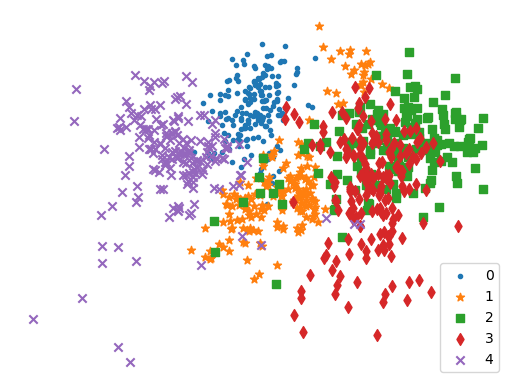

In [80]:
markers=['.','*','s','d','x']
for i in range(5):
    plt.scatter(x2[y==i,0],x2[y==i,1],marker=markers[i])
plt.legend(range(5))
plt.axis('off')

In [6]:
#坐标式稀疏矩阵COO
import numpy as np
from scipy.sparse import coo_matrix
row = np.array([0,0,0,0,1,2,2,2,3,3,3])
col = np.array([0,2,4,5,4,2,4,5,0,2,5])
data = np.array([1,3,6,9,1,5,8,8,12,16,9])
coomtrx = coo_matrix((data,(row,col)),shape=(4,6))
print(type(coomtrx))
print(coomtrx)

<class 'scipy.sparse._coo.coo_matrix'>
  (0, 0)	1
  (0, 2)	3
  (0, 4)	6
  (0, 5)	9
  (1, 4)	1
  (2, 2)	5
  (2, 4)	8
  (2, 5)	8
  (3, 0)	12
  (3, 2)	16
  (3, 5)	9


In [7]:
print(coomtrx.toarray())

[[ 1  0  3  0  6  9]
 [ 0  0  0  0  1  0]
 [ 0  0  5  0  8  8]
 [12  0 16  0  0  9]]


In [9]:
#行压缩稀疏矩阵CSR
from scipy.sparse import csr_matrix
data = np.array([1,3,6,9,1,5,8,8,12,16,19])
indices = np.array([0,4,2,5,4,2,4,5,0,2,5])
idptr = np.array([0,4,5,8,11])
csrmat = csr_matrix((data,indices,idptr),shape=(4,6))
print(type(csrmat))
print(csrmat)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 0)	1
  (0, 4)	3
  (0, 2)	6
  (0, 5)	9
  (1, 4)	1
  (2, 2)	5
  (2, 4)	8
  (2, 5)	8
  (3, 0)	12
  (3, 2)	16
  (3, 5)	19


In [11]:
print(csrmat.toarray())

[[ 1  0  6  0  3  9]
 [ 0  0  0  0  1  0]
 [ 0  0  5  0  8  8]
 [12  0 16  0  0 19]]


In [15]:
#列压缩稀疏矩阵CSC
from scipy.sparse import csc_matrix
data = np.array([1,3,6,9,1,5,8,8,12,16,19])
indices = np.array([0,3,0,2,2,3,0,1,2,0,3])
idptr = np.array([0,4,5,8,11,3,6])
cscmat = csc_matrix((data,indices,idptr),shape=(4,6))
print(type(cscmat))
print(cscmat)

<class 'scipy.sparse._csc.csc_matrix'>
  (0, 0)	1
  (3, 0)	3
  (0, 0)	6
  (2, 5)	9
  (2, 5)	1
  (3, 5)	5


In [16]:
print(cscmat.toarray())

[[ 7  0  8 16  0  0]
 [ 0  0  8  0  0  0]
 [ 9  1  0 12  0 10]
 [ 3  0  5 19  0  5]]


In [17]:
#行块压缩稀疏矩阵BSR
from scipy.sparse import bsr_matrix
data = np.array([1,2,3,4,5,6]).repeat(4).reshape(6,2,2)
print(data)

[[[1 1]
  [1 1]]

 [[2 2]
  [2 2]]

 [[3 3]
  [3 3]]

 [[4 4]
  [4 4]]

 [[5 5]
  [5 5]]

 [[6 6]
  [6 6]]]


In [19]:
indices = np.array([0,2,2,0,1,2])
indptr = np.array([0,2,3,6])
bsrmat = bsr_matrix((data,indices,indptr),shape=(6,6))
print(bsrmat)
print(type(bsrmat))

  (0, 0)	1
  (0, 1)	1
  (1, 0)	1
  (1, 1)	1
  (0, 4)	2
  (0, 5)	2
  (1, 4)	2
  (1, 5)	2
  (2, 4)	3
  (2, 5)	3
  (3, 4)	3
  (3, 5)	3
  (4, 0)	4
  (4, 1)	4
  (5, 0)	4
  (5, 1)	4
  (4, 2)	5
  (4, 3)	5
  (5, 2)	5
  (5, 3)	5
  (4, 4)	6
  (4, 5)	6
  (5, 4)	6
  (5, 5)	6
<class 'scipy.sparse._bsr.bsr_matrix'>


In [20]:
print(bsrmat.toarray())

[[1 1 0 0 2 2]
 [1 1 0 0 2 2]
 [0 0 0 0 3 3]
 [0 0 0 0 3 3]
 [4 4 5 5 6 6]
 [4 4 5 5 6 6]]


In [21]:
#对角线稀疏矩阵DIA
from scipy.sparse import dia_matrix
data = np.array([[1,2,3,4],[4,2,3,8],[7,2,4,5],[6,7,8,9]])
offsets = np.array([0,-2,2,-1])
diamat = dia_matrix((data,offsets),shape=(4,4))
print(type(diamat))
print(diamat)

<class 'scipy.sparse._dia.dia_matrix'>
  (0, 0)	1
  (1, 1)	2
  (2, 2)	3
  (3, 3)	4
  (2, 0)	4
  (3, 1)	2
  (0, 2)	4
  (1, 3)	5
  (1, 0)	6
  (2, 1)	7
  (3, 2)	8


In [23]:
print(diamat.toarray())

[[1 0 4 0]
 [6 2 0 5]
 [4 7 3 0]
 [0 2 8 4]]


In [24]:
#字典式稀疏矩阵DOK
from scipy.sparse import dok_matrix
dokmat = dok_matrix((4,4),dtype=np.float32)
dokmat[0,0] = 6.6
dokmat[1,3] = 4.4
dokmat[2,1] = 3.3
dokmat[2,3] = 2.2
dokmat[3,2] = 1.1
print(dokmat)
print(type(dokmat))

  (0, 0)	6.6
  (1, 3)	4.4
  (2, 1)	3.3
  (2, 3)	2.2
  (3, 2)	1.1
<class 'scipy.sparse._dok.dok_matrix'>


In [25]:
print(dokmat.toarray())

[[6.6 0.  0.  0. ]
 [0.  0.  0.  4.4]
 [0.  3.3 0.  2.2]
 [0.  0.  1.1 0. ]]


In [26]:
#基于行列表的列表式稀疏矩阵LIL
from scipy.sparse import lil_matrix
lilmat = lil_matrix((4,5),dtype=np.float32)
data = np.round(np.random.rand(2,3),2)
print(data)

[[0.03 0.11 0.56]
 [0.52 0.97 0.63]]


In [27]:
lilmat[:2,[1,2,3]] = data
print(type(lilmat))
print(lilmat)

<class 'scipy.sparse._lil.lil_matrix'>
  (0, 1)	0.029999999329447746
  (0, 2)	0.10999999940395355
  (0, 3)	0.5600000023841858
  (1, 1)	0.5199999809265137
  (1, 2)	0.9700000286102295
  (1, 3)	0.6299999952316284


In [28]:
print(lilmat.toarray())

[[0.   0.03 0.11 0.56 0.  ]
 [0.   0.52 0.97 0.63 0.  ]
 [0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.  ]]


In [29]:
from scipy import stats
from scipy.stats import t
np.random.seed(123)
x = t.rvs(10,size=99,scale=1) #自由度10，样本数99
print(x)

[-9.06598427e-01  1.64246938e+00 -2.78356318e+00 -3.28462831e-01
  1.80378743e+00  1.83314811e-01  9.52866263e-01  1.31472151e+00
 -1.51608015e+00 -7.33650003e-01 -6.17816986e-01 -1.16400332e+00
  2.53195566e-03 -4.26224309e-01 -3.56270911e-01  1.29865634e-02
  6.49221349e-01 -1.17909086e+00  2.44345544e-02  1.43322315e+00
 -6.72404896e-01 -8.71924482e-01  1.23018255e+00  8.59984424e-01
  5.95726381e-01  3.71459931e-01 -4.30005678e-01  1.99014168e+00
  1.53785731e+00 -7.81626806e-01 -1.03444670e+00 -7.02066342e-01
  1.65011375e+00  1.13577386e+00 -1.59999248e+00 -4.09382032e-01
  4.44630996e-01 -8.74318118e-01  6.76038601e-01  1.83136281e+00
  9.84115465e-01 -1.68003083e-01  3.55771393e+00  4.58458247e-01
  1.77500869e+00  6.55944302e-02  5.62837247e-01  1.52353705e+00
  7.32163096e-01 -3.26571728e+00 -8.27274506e-01 -4.46182164e-01
  3.42728829e-01 -3.85549531e-01 -1.01570695e+00 -1.08681643e-01
  2.20097282e-02 -1.28658406e+00  2.08181802e+00 -3.14301003e-01
 -1.10496584e+00  2.28998

In [30]:
print(x.min())

-3.2657172823398275


In [31]:
print(x.max())

3.557713929464179


In [32]:
print(x.mean())

0.048323881596873966


In [33]:
print(x.var())

1.3193829270711561


In [36]:
#mean,variance,Fisher's skew,Fisher's kurtosis
m,v,s,k = t.stats(10,moments='mvsk')
print(m,v,s,k) #t分布参数

0.0 1.25 0.0 1.0


In [37]:
n,(smin,smax),sm,sv,ss,sk = stats.describe(x)
print(sm,sv,ss,sk) #样本对应参数

0.048323881596873966 1.3328460181637187 -0.015123118106485568 0.38028482014730214
